In [258]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [277]:
#Analysiing data over athletes and their olympic events:
df=pd.read_csv('athlete_events.csv')
df.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [78]:
#getting the size:
df.shape

(271116, 15)

In [79]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [80]:
#sorting the data age wise in ascending order:
df.sort_values("Age", inplace = True)

In [81]:
#removing duplicates:
df.drop_duplicates(subset ="Name", keep = False, inplace = True) 
df.shape

(77009, 15)

In [82]:
df['Age'].value_counts()


23.0    7211
22.0    7081
24.0    6613
21.0    6113
25.0    6032
        ... 
97.0       1
76.0       1
73.0       1
75.0       1
10.0       1
Name: Age, Length: 70, dtype: int64

In [83]:
#displaying countrie and sports wrt females: 
females = (df['Sex'] =='M')
result=df.loc[females , ['City' ,'Sport']]
result

,City,Sport
142882,Athina,Gymnastics
73461,Barcelona,Rowing
84361,Munich,Rowing
46955,Los Angeles,Rowing
96665,Calgary,Figure Skating
...,...,...
270679,London,Hockey
270774,Los Angeles,Boxing
270793,Amsterdam,Hockey
270804,London,Athletics


In [84]:
df['Age'].median()

24.0

In [89]:
hi=(df['Medal']=='Silver')
hi

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Medal, Length: 271116, dtype: bool

In [105]:
#how many different people actually won a medal since 1900?
rows = df.shape[0]

unique_athletes = len(df.Name.unique())

medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())

print(f'Amongst {rows} entries , {unique_athletes} is the actual number of athletes who registered and {medal_winners} is the number of medal winners.')



Amongst 271116 entries , 134732 is the actual number of athletes who registered and 28202 is the number of medal winners.


In [127]:
#how many medals have actually been earned throughout these 120 years?
        
f=df.Medal.value_counts() 
print(f)
print(f'total is {f[0]+f[1]+f[2]}')
    
    

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64
total is 39783


In [163]:
#What about distribution of medals by countries?
team_groups = df.groupby(['Team'])
tt=team_groups['Medal'].value_counts().sort_values(ascending=False).head(20)
tt

Team           Medal 
United States  Gold      2474
               Silver    1512
               Bronze    1233
Soviet Union   Gold      1058
               Silver     716
Germany        Gold       679
               Bronze     678
Soviet Union   Bronze     677
Germany        Silver     627
Great Britain  Silver     582
France         Bronze     577
Great Britain  Bronze     572
Italy          Gold       535
Great Britain  Gold       519
France         Silver     518
Australia      Bronze     511
Italy          Silver     508
Sweden         Bronze     507
Italy          Bronze     484
Sweden         Silver     476
Name: Medal, dtype: int64

In [172]:
#How many medals did women win and how many did men win:
females = len(df[df['Sex']=='F'].Name.unique())
males = len(df[df['Sex']=='M'].Name.unique())
fem_medals = df[df['Sex']=='F'].Medal.count()
men_medals = df[df['Sex']=='M'].Medal.count()
print(f'Total females who participated are : {females}')
print()
print(f'Total males who participated are : {males}')
print()
print(f'Total females who won are : {fem_medals}')
print()
print(f'Total males who won are : {men_medals}')

Total females who participated are : 33808

Total males who participated are : 100979

Total females who won are : 11253

Total males who won are : 28530


In [264]:
data=df.Year
Year=data.sort_values().unique()
Years=[]
for i in range(1,35):
    Years.append(Year[i])
Years


In [267]:
df2= df[df['Sex']=='F']
group1 = df2.groupby(['Year'])
fem=group1['Sex'].value_counts()


df3= df[df['Sex']=='M']
group2 = df3.groupby(['Year'])
m=group2['Sex'].value_counts()
men=[]
for i in range(34):
    men.append(m[i+1])
len(men)

34

<IPython.core.display.Javascript object>


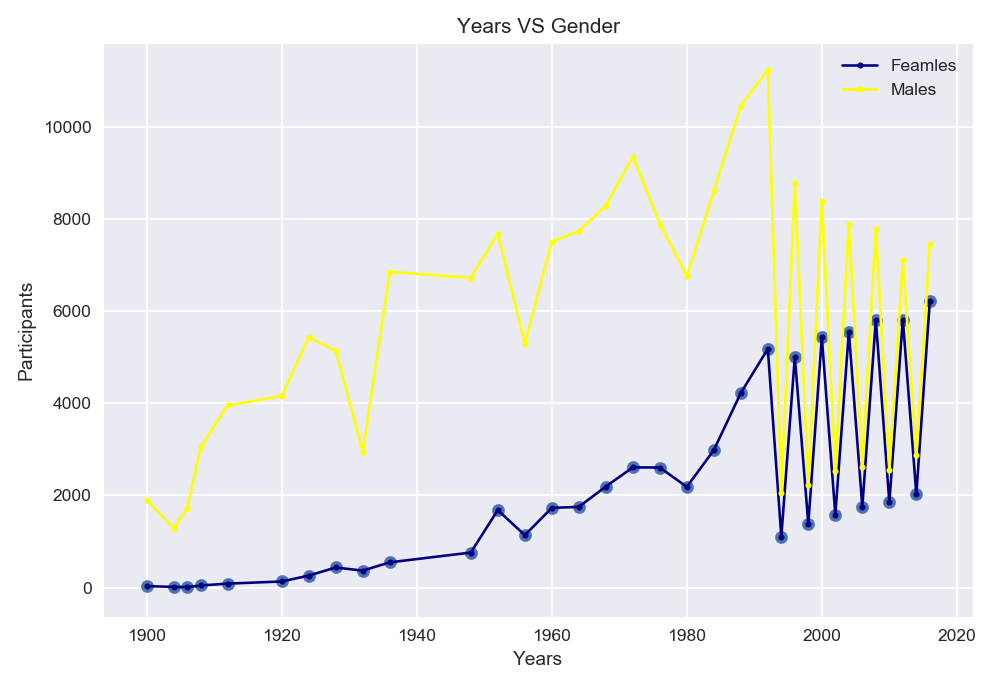

In [268]:
#Now we'll be plotting a graph which would be years(x) vs Females(y):
#simple line plot:

plt.style.use('seaborn')
plt.plot(Years , fem , color='navy' , linewidth=1.5 , marker='.', label= 'Feamles')
plt.plot(Years , men , color='yellow' , linewidth=1.5 , marker='.', label= 'Males')
plt.title('Years VS Gender')
plt.xlabel('Years')
plt.ylabel('Participants')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [276]:
#another way to group females and males:
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name

